# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 读取数据

In [252]:
original_data = pd.read_csv("house_price.csv")
original_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 评估和清理数据

数据整齐度：每列一个变量，每行一个观察值，每种类型的观察值为一个表格

数据干净度：丢失数据，重复数据，无效数据，数据类型，不一致数据

In [253]:
cleaned_data = original_data.copy()

### 数据整齐度

数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

#### 处理缺失数据

In [254]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


无缺失数据

mainroad（是否位于主路）、guestroom（是否有客房）、basement（是否有地下室）、hotwaterheating（是否有热水器）、airconditioning（是否有空调）、prefarea（是否位于城市首选社区）、furnishingstatus（装修状态）都是分类数据，把数据类型都转换为Category。

In [255]:
cleaned_data["mainroad"] = cleaned_data["mainroad"].astype("category")
cleaned_data["guestroom"] = cleaned_data["guestroom"].astype("category")
cleaned_data["basement"] = cleaned_data["basement"].astype("category")
cleaned_data["hotwaterheating"] = cleaned_data["hotwaterheating"].astype("category")
cleaned_data["airconditioning"] = cleaned_data["airconditioning"].astype("category")
cleaned_data["prefarea"] = cleaned_data["prefarea"].astype("category")
cleaned_data["furnishingstatus"] = cleaned_data["furnishingstatus"].astype("category")

In [256]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### 处理重复数据

In [257]:
cleaned_data.duplicated().sum()

np.int64(0)

#### 处理不一致数据

In [258]:
cleaned_data["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [259]:
cleaned_data["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [260]:
cleaned_data["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [261]:
cleaned_data["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [262]:
cleaned_data["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [263]:
cleaned_data["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [264]:
cleaned_data["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

不存在不一致数据

#### 处理无效数据或错误数据

In [265]:
cleaned_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


不存在脱离现实意义的数值

## 探索数据

探究房价的分布，各自变量对房价的影响

In [266]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

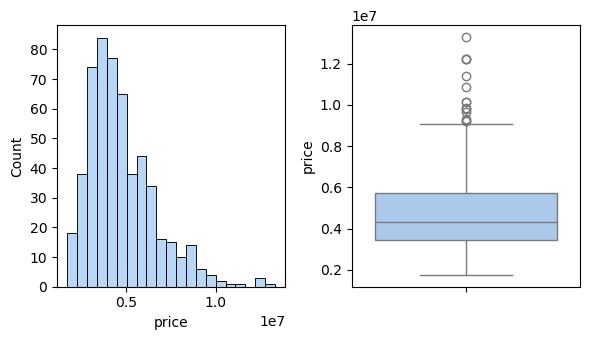

In [267]:
plt.rcParams["figure.figsize"] = [6.00,3.50]
plt.rcParams["figure.autolayout"] = True
#Matplotlib 中用于自动调整图表布局的配置，它的主要作用是自动优化图表元素（如标题、坐标轴标签、图例等）的位置，避免这些元素相互重叠或超出图表边界
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data["price"],ax=axes[0])
sns.boxplot(cleaned_data["price"],ax=axes[1])
sns.set_palette("pastel")
plt.show()

房价呈右偏态分布，说明数据集中的大多数房子价格中等，但有一些价格很高的极端值，使得均值被拉高。

### 面积与房价的关系

面积的数据太过零散，所以不能用histplot和barplot，用散点图scatterplot

<Axes: xlabel='area', ylabel='price'>

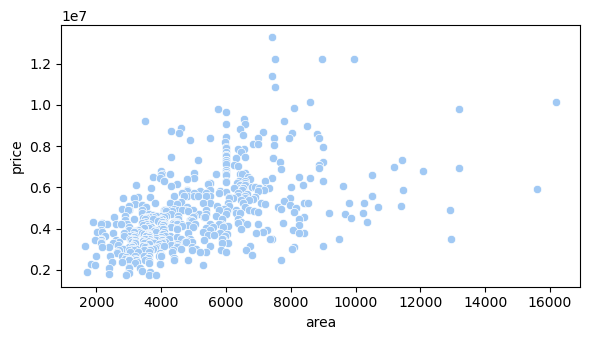

In [268]:
sns.scatterplot(cleaned_data,x="area",y="price")

从散点图来看，能大致看出一些正相关关系，但关系的强度需要后续通过计算相关性来得到。

### 洗手间数与房价

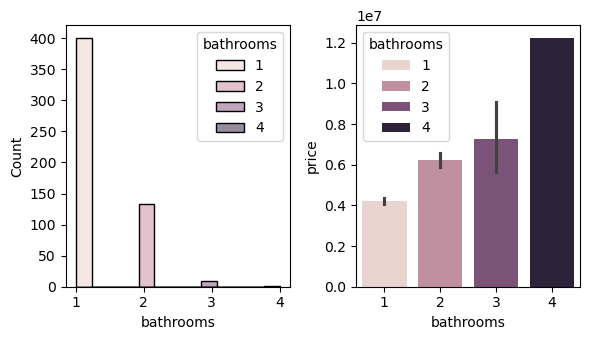

In [269]:
plt.rcParams["figure.figsize"]=[6.00,3.50]
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data,x="bathrooms",ax=axes[0],hue="bathrooms")
sns.barplot(cleaned_data,x="bathrooms",y="price",ax=axes[1],hue="bathrooms")
plt.show()

### 卧室数与房价

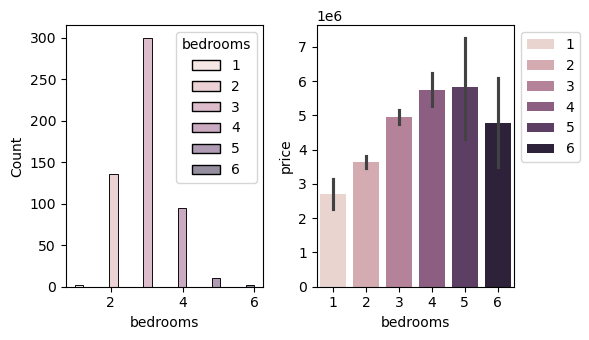

In [270]:
plt.rcParams["figure.figsize"]=[6.00,3.50]
plt.rcParams["figure.autolayout"] = True
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data,x="bedrooms",ax=axes[0],hue="bedrooms")
sns.barplot(cleaned_data,x="bedrooms",y="price",ax=axes[1],hue="bedrooms")
axes[1].legend(bbox_to_anchor=(1, 1))  # 放在右侧上方
plt.show()

### 楼层数与房价

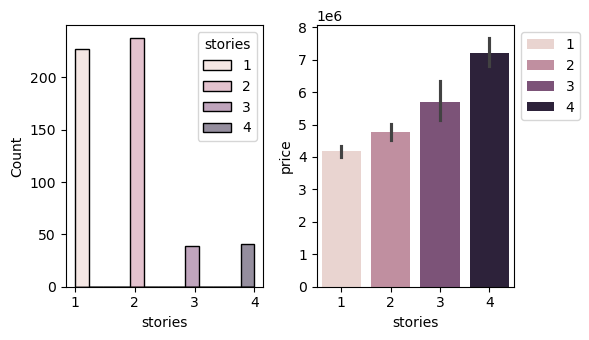

In [271]:
plt.rcParams["figure.figsize"] = [6.00,3.50]
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data,x="stories",hue="stories",ax = axes[0])
sns.barplot(cleaned_data,x="stories",y="price",hue="stories",ax = axes[1])
axes[1].legend(bbox_to_anchor=(1,1))
plt.show()

### 车库数与房价

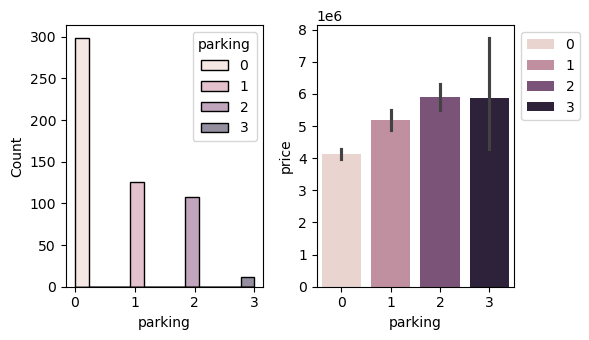

In [272]:
plt.rcParams["figure.figsize"] = [6.00,3.50]
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_data,x="parking",hue="parking",ax = axes[0])
sns.barplot(cleaned_data,x="parking",y="price",hue="parking",ax = axes[1])
axes[1].legend(bbox_to_anchor=(1,1))
plt.show()

### 是否在主路与房价

分类变量用饼图更直观

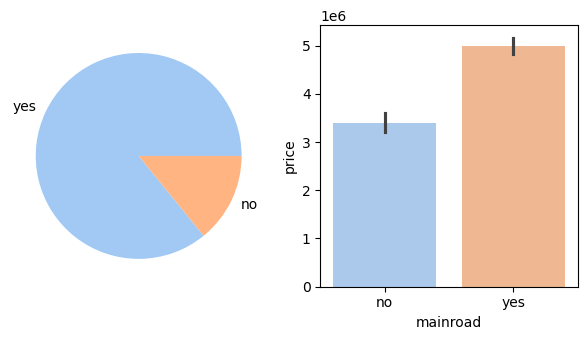

In [273]:
figure,axes = plt.subplots(1,2)
#plt.pie() 函数用于绘制饼图，需要传入数据，而cleaned_data["mainroad"] 是一个分类变量（如布尔值或字符串），而 plt.pie() 期望的是数值数据（如各部分的占比）。
mainroad_count = cleaned_data["mainroad"].value_counts()
axes[0].pie(mainroad_count,labels = mainroad_count.index)
sns.barplot(cleaned_data,x="mainroad",y="price",hue="mainroad",ax = axes[1])
plt.show()

### 是否有客人房与房价

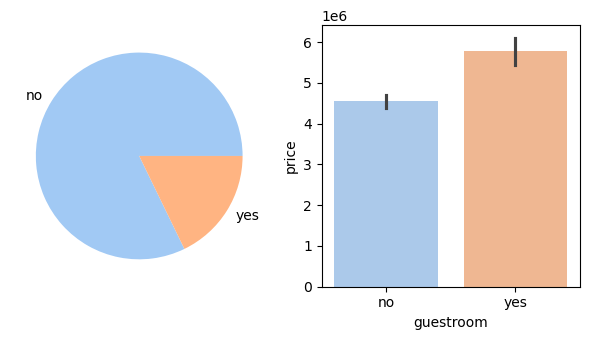

In [274]:
figure,axes = plt.subplots(1,2)
guestroom_count = cleaned_data["guestroom"].value_counts()
axes[0].pie(guestroom_count,labels = guestroom_count.index)
sns.barplot(cleaned_data,x="guestroom",y="price",hue="guestroom",ax = axes[1])
plt.show()

### 是否有地下室与房价

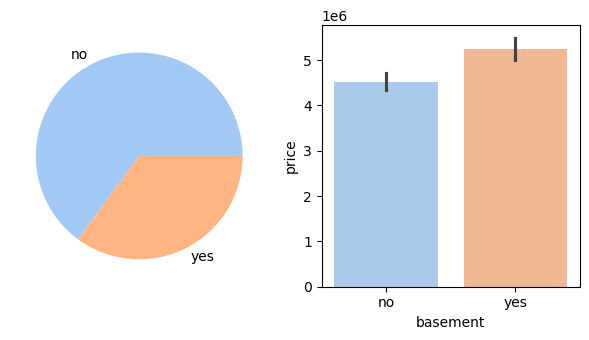

In [275]:
figure,axes = plt.subplots(1,2)
basement_count = cleaned_data["basement"].value_counts()
axes[0].pie(basement_count,labels = basement_count.index)
sns.barplot(cleaned_data,x="basement",y="price",hue="basement",ax = axes[1])
plt.show()

### 是否有热水器与房价

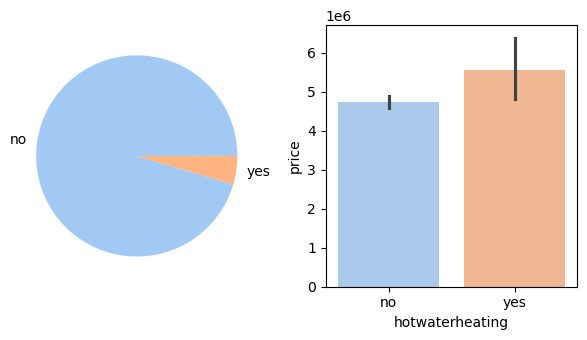

In [276]:
figure,axes = plt.subplots(1,2)
hotwaterheating_count = cleaned_data["hotwaterheating"].value_counts()
axes[0].pie(hotwaterheating_count,labels = hotwaterheating_count.index)
sns.barplot(cleaned_data,x="hotwaterheating",y="price",hue="hotwaterheating",ax = axes[1])
plt.show()

### 是否有空调与房价

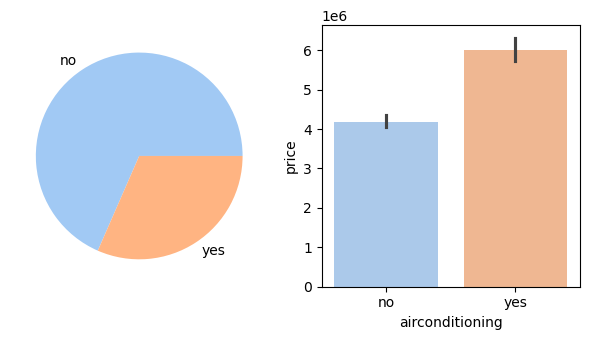

In [277]:
figure,axes = plt.subplots(1,2)
airconditioning_count = cleaned_data["airconditioning"].value_counts()
axes[0].pie(airconditioning_count,labels = airconditioning_count.index)
sns.barplot(cleaned_data,x="airconditioning",y="price",hue="airconditioning",ax = axes[1])
plt.show()

### 是否位于城市首选社区与房价

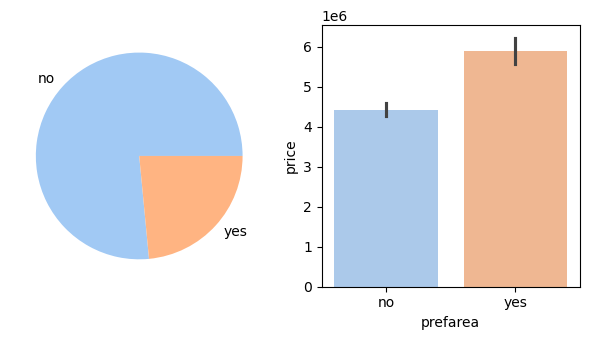

In [278]:
figure,axes = plt.subplots(1,2)
prefarea_count = cleaned_data["prefarea"].value_counts()
axes[0].pie(prefarea_count,labels = prefarea_count.index)
sns.barplot(cleaned_data,x="prefarea",y="price",hue="prefarea",ax = axes[1])
plt.show()

### 装修状态与房价

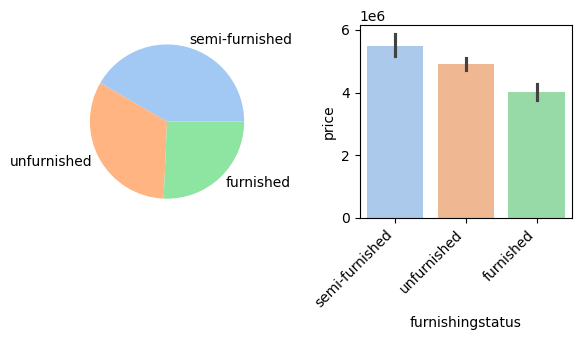

In [279]:
figure,axes = plt.subplots(1,2)
plt.rcParams["figure.autolayout"] = True
furnishingstatus_count = cleaned_data["furnishingstatus"].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count,labels = furnishingstatus_label)
sns.barplot(cleaned_data,x="furnishingstatus",y="price",hue="furnishingstatus",ax = axes[1])
axes[1].set_xticks(range(len(furnishingstatus_label)))  # 设置刻度位置
axes[1].set_xticklabels(furnishingstatus_label, rotation=45, horizontalalignment='right')
plt.show()

## 分析数据

In [280]:
import statsmodels.api as sm

然后可以创建一个新的DataFramelr_house_price，让它作为我们进行线性回归分析所用的数据。

和cleaned_house_price区分开的原因是，我们在进行回归分析前，还可能需要对数据进行一些准备，比如引入虚拟变量，这些都可以在lr_house_price上执行。

In [281]:
lr_house_price = cleaned_data.copy()

由于数据里存在分类变量，无法直接建立线性回归模型。我们需要引入虚拟变量，也就是用0和1分别表示是否属于该分类。

In [282]:
lr_house_price = pd.get_dummies(lr_house_price, drop_first=True, columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea', 
                                                         'furnishingstatus'], dtype=int)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下来，我们要把因变量和自变量划分出来。

因变量是price变量，因为我们进行线性回归的目的，是得到一个能根据其它可能对房屋价格有影响的变量，来预测销售价格的模型。



In [283]:
Y = lr_house_price["price"]

In [284]:
X = lr_house_price.drop("price",axis=1)

相关系数

In [285]:
X.corr().abs()>0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


相关系数大于0.8，可能导致严重共线性，从以上输出来看，不同变量之间相关系数的绝对值均小于或等于0.8。

接下来，给模型的线性方程添加截距。

In [286]:
X = sm.add_constant(X)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


建立线性回归模型，利用最小二乘法来得到线性回归模型的参数值。

In [287]:
model = sm.OLS(Y,X)
result = sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Fri, 01 Aug 2025   Prob (F-statistic):          9.07e-123
Time:                        17:22:35   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为以下因素对房屋价格没有显著性影响：卧室数、是否为简装房。此外，常数（表示线性方程的截距）的P值也很大，说明也没有显著影响。

可以把这些变量移除后，再次建立线性回归模型。

In [288]:
X = X.drop(["const","bedrooms","furnishingstatus_semi-furnished"],axis=1)

In [289]:
result = sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Fri, 01 Aug 2025   Prob (F-statistic):                        0.00
Time:                        17:22:35   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把P值较大的自变量从线性回归模型中移除后，R方的值从0.682增长到了0.957，提高了模型对现有数据的拟合度。

根据各个自变量在线性回归方程中的系数来看，模型预测以下因素的增加（或存在）会显著增加房屋价格：房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区。

线性回归模型预测以下因素的增加（或存在）会显著降低房屋价格：房屋未经装修，为毛坯房。

In [290]:
# 要预测房价的房屋的信息：
# 面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修

建一个dataframe放要预测的房价的信息

In [299]:
predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2],  'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
              'basement': ['yes'], 'hotwaterheating': ['yes'],  'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
             'furnishingstatus': ['semi-furnished']})
predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


In [300]:
predict["mainroad"] = pd.Categorical(predict["mainroad"],categories=["no","yes"])
predict["guestroom"] = pd.Categorical(predict["guestroom"],categories=["no","yes"])
predict["basement"] = pd.Categorical(predict["basement"],categories=["no","yes"])
predict["hotwaterheating"] = pd.Categorical(predict["hotwaterheating"],categories=["no","yes"])
predict["airconditioning"] = pd.Categorical(predict["airconditioning"],categories=["no","yes"])
predict["prefarea"] = pd.Categorical(predict["prefarea"],categories=["no","yes"])
predict["furnishingstatus"] = pd.Categorical(predict["furnishingstatus"],categories=['furnished', 'semi-furnished', 'unfurnished'])
#categories=["yes", "no"]：明确指定该列只能包含这两个值。

对分类变量引入虚拟变量

In [301]:
predict = pd.get_dummies(predict,drop_first=True,columns=['mainroad', 'guestroom','basement', 'hotwaterheating',
                                                          'airconditioning','prefarea', 'furnishingstatus'],dtype=int)
predict

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [302]:
predict_ = predict.drop(["bedrooms","furnishingstatus_semi-furnished"],axis=1)

In [305]:
predict_value = result.predict(predict_)
predict_value

0    7.071927e+06
dtype: float64

线性回归模型预测的价格为：7071927。